In [1]:
# Imports
import sys
sys.path.insert(0, "../src")
from main import load_database

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import yaml

In [2]:
import matplotlib as mpl
# Set the font to a serif one
mpl.rcParams['font.family'] = 'serif'
# Ensure fonts are embedded in the output
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 8

In [3]:
# Load the labels DataFrame
# Load the experiment configuration from the YAML file
with open("../src/experiment_parameters.yaml", 'r') as stream:
    config = yaml.safe_load(stream)

df_files = load_database(config)

Number of participants before filtering out too few sessions: 27; Shape of the DataFrame before filtering: (3346, 152)
Number of participants after filtering out too few sessions: 25; Shape of the DataFrame after filtering: (3304, 152)
Shape of the DataFrame after filtering prompts: (3204, 152)


In [4]:
speakers_test = ['9f9ab51a-8f08-5849-7c05-79d62b13547a', '438cf652-7363-66be-3082-1e0c831a15b3', '16a6213f-fe81-de19-b8db-2aed14244e82', '76241337-a906-782a-7476-f73763ba0f29', '86060b2c-88c0-8c54-bfdc-dabbf2bdd9fd']

In [5]:
df_test = df_files[df_files['participant_code'].isin(speakers_test)]
df_train = df_files[~df_files['participant_code'].isin(speakers_test)]

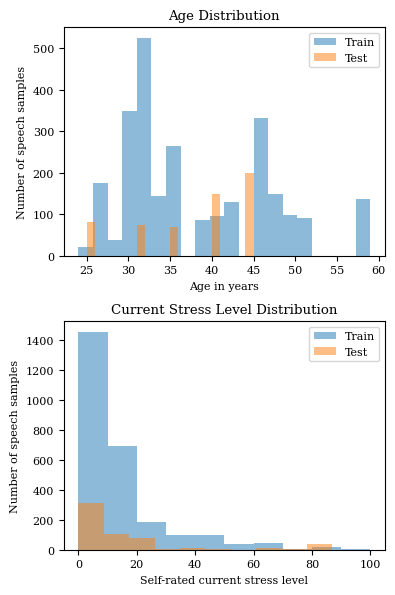

In [6]:
plt.figure(figsize=(4, 6))  # Adjusted figure size

# Histogram for 'age'
plt.subplot(2, 1, 1)
plt.hist(df_train['age'], bins=20, alpha=0.5, label='Train')
plt.hist(df_test['age'], bins=20, alpha=0.5, label='Test')
plt.title('Age Distribution')
plt.xlabel('Age in years')  # X-axis label
plt.ylabel('Number of speech samples')  # Y-axis label
plt.legend(loc='upper right')

# Histogram for 'stress_current'
plt.subplot(2, 1, 2)
plt.hist(df_train['stress_current'], bins=10, alpha=0.5, label='Train')  # bins=30
plt.hist(df_test['stress_current'], bins=10, alpha=0.5, label='Test')
plt.title('Current Stress Level Distribution')
plt.xlabel('Self-rated current stress level')  # X-axis label
plt.ylabel('Number of speech samples')  # Y-axis label
plt.legend(loc='upper right')

plt.tight_layout()

# Save the figure
for cur_extension in [".png", ".pdf", ".svg"]:
    plt.savefig(
        os.path.join("figures", f"hist-target_age_distribution_train_test{cur_extension}"),
        bbox_inches="tight",
    )

plt.show()
plt.close()

### More compact version to save space in the paper

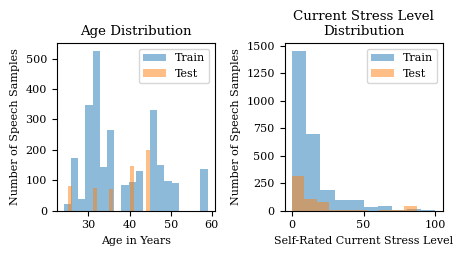

In [7]:
plt.figure(figsize=(4.6, 2.6))  # Adjusted figure size

# Histogram for 'age'
plt.subplot(1, 2, 1)  # Changed subplot arrangement
plt.hist(df_train['age'], bins=20, alpha=0.5, label='Train')
plt.hist(df_test['age'], bins=20, alpha=0.5, label='Test')
plt.title('Age Distribution')
plt.xlabel('Age in Years')  # X-axis label
plt.ylabel('Number of Speech Samples')  # Y-axis label
plt.legend(loc='upper right')

# Histogram for 'stress_current'
plt.subplot(1, 2, 2)  # Changed subplot arrangement
plt.hist(df_train['stress_current'], bins=10, alpha=0.5, label='Train')  # bins=30
plt.hist(df_test['stress_current'], bins=10, alpha=0.5, label='Test')
plt.title('Current Stress Level\nDistribution')
plt.xlabel('Self-Rated Current Stress Level')  # X-axis label
plt.ylabel('Number of Speech Samples')  # Y-axis label
plt.legend(loc='upper right')

plt.tight_layout()

# Save the figure
for cur_extension in [".png", ".pdf", ".svg"]:
    plt.savefig(
        os.path.join("figures", f"hist-target_age_distribution_train_test-horizontal{cur_extension}"),
        bbox_inches="tight",
    )

plt.show()
plt.close()